## Titanic - Logistic Regression(Classification)

### Using K-Nearest Neighbor 

The Goal of this is to predict if an individual would survive or not on the titanic shipwreck

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.neighbors import KNeighborsClassifier

In [2]:
#load dataset

train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#load testset and save passengerid to be used for later

test = pd.read_csv('test.csv')

passengerid = test['PassengerId']

In [4]:
#dropping the passenger ids in both dataset, this does not have any correlation to whether an 
#individual will survive or not 

train, test = train.drop('PassengerId', axis = 1) , test.drop('PassengerId', axis = 1)

the main aim of this is to predict the survival on the titanic. therefore survival is the target varaible. First, performing summary statistics.

In [5]:
#Let's take a look at the dataset 
train["Survived"].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

From the summary statistics performed, it can be seen that the mean of the survived is 0.383838 with a minimum of zero and maximum of 1. It is also known that, females and children have a higher chances of surviving so as the higher class. Finding correlation of the other variables and the target variable to know the effect they have on the target variable

In [6]:
#finding the relationship between the survived and other variables 
correlation = train.corr()
correlation.sort_values(["Survived"])
correlation.Survived

Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

from the above, it can be seen that Pclass has higher correlation to survived compared to the rest. therefore the higher the class(1), the higher the change of surviving(1). that is, if the class has a high number(3), the lower the chances of surviving

## Data Cleaning 

In [7]:
#concating the trainset and the testset for cleaning 
data = pd.concat((train, test))

In [8]:
#identifying missing values 
data.isnull().values.any()

True

In [9]:
#check for missing values
data.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

The missing values are found in the above features or columns

In [10]:
len(data)

1309

out of 1309 entires, there 1014 missing cabin values, imputing this variable and using it in the prediction must not be advisable. Hence it will be ignored and dropped.

In [11]:
#dropping the cabin variable from the dataset since it is not so relevant in the prediction

dataset = data.drop('Cabin', axis = 1)

for the age, median would be used to impute the missing values

In [12]:
median = dataset["Age"].median()
dataset["Age"].fillna(median, inplace = True)

Same would be done for fare

In [13]:
median = dataset["Fare"].median()
dataset["Fare"].fillna(median, inplace = True)

for embarked, the mode would be used to fill out the missing values

In [14]:
dataset["Embarked"].mode()

0    S
dtype: object

In [15]:
dataset["Embarked"].fillna("S", inplace = True)

In [16]:
#checking if all the missing values have been imputed 
dataset.isnull().values.any()

True

In [17]:
dataset.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

The above missing values are found in the survived variable which is the target variable needed to be predicted of the test dataset. 

In [18]:
dataset.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
176,NaN,2,"Sincock, Miss. Maude",female,20.0,0,0,C.A. 33112,36.7500,S
885,0.0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
289,NaN,3,"Ford, Mr. Arthur",male,28.0,0,0,A/5 1478,8.0500,S
292,NaN,3,"Nasr, Mr. Mustafa",male,28.0,0,0,2652,7.2292,C
28,NaN,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,S


## More understanding of the dataset

In [19]:
#finding out which sex has the higher chances of suviving 
dataset.groupby(["Sex"]).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.154506,28.572082,0.652361,0.633047,46.198097
male,0.188908,2.372479,30.017888,0.413998,0.247924,26.140721


In [20]:
#finding which class has the higher chances of surviving 
dataset.groupby(["Pclass"]).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,37.812446,0.436533,0.365325,87.508992
2,0.472826,29.419675,0.393502,0.368231,21.179196
3,0.242363,25.750353,0.568406,0.400564,13.304513


the upper class(1st) has the higher chances of surviving. It is inline with the above correlation found. where by when the class is lower that is 3, the chances of surviving it less.

from the above, females have a higher chances of surviving as compared to males with a survival rate of 0.74

## Feature Engineering 

In [21]:
#creating a new variable to tell if the passenger was traveling alone or with either a parent or a sibling 
dataset["Alone"]=np.where((dataset["SibSp"]+dataset["Parch"]) >0, 0, 1)

In [22]:
#finding out the chances of surviving if the passenger traveled alone 
dataset.groupby(["Alone"]).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Alone,,,,,,
0,0.505650,2.142582,27.798979,1.258189,0.971098,50.831801
1,0.303538,2.394937,30.622785,0.000000,0.000000,21.750932


there is a 50.6% chances that the passenger will survival if traveling alone.

In [23]:
#creating a new feature using the titles of the individual 
dataset["Title"] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr


In [24]:
#making some adjustments to the titles 
for i in dataset:
    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")
    dataset["Title"] = dataset["Title"].replace(["Lady", "Sir", "Countess", "Jonkheer"], "Royalty")
    dataset["Title"] = dataset["Title"].replace(["Capt", "Col", "Don", "Dona", "Major", 
                                                 "Dr","Rev", "Master"], "High rank")

In [25]:
#finding out the chances of surviving based on the title of the individual 
dataset[["Title","Survived"]].groupby(["Title"]).mean()

,Survived
Title,
High rank,0.474576
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Royalty,0.750000


Royalties have higher chances of surviving as compared to the other titles.

In [26]:
#dropping the name column and the ticket column which is irrevelant to our prediction
dataset = dataset.drop(["Name", "Ticket"], axis = 1)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone,Title
0,0.0,3,male,22.0,1,0,7.2500,S,0,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,0,Mrs
2,1.0,3,female,26.0,0,0,7.9250,S,1,Miss
3,1.0,1,female,35.0,1,0,53.1000,S,0,Mrs
4,0.0,3,male,35.0,0,0,8.0500,S,1,Mr


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   object 
 8   Alone     1309 non-null   int64  
 9   Title     1309 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 112.5+ KB


## Data Encoding 

In [28]:
#age is a categorical data not numerical in this case. therefore, grouping the into children, youngster ... and 
#converting them into proper numerical values 

dataset["Age"].astype(int)
dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0                             #Children
dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1       #Teens
dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2       #Youngsters
dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3      #Young Adults
dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4      #Adults
dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5      #Middle Age
dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6      #Senior
dataset.loc[ dataset['Age'] > 66, 'Age'] = 7                             #Retired

In [29]:
#for fare
dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0                                 #Extremely low
dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1  #very low
dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2   #low
dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3        #high
dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4       #very high
dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5                                     #extremely high

In [30]:
dataset = dataset.drop("Survived", axis = 1)

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   object 
 7   Alone     1309 non-null   int64  
 8   Title     1309 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 102.3+ KB


Changing categorical data into numerical data

In [32]:
from sklearn.preprocessing import LabelEncoder

cols = ("Embarked","Sex", "Title")
for i in cols:
    le = LabelEncoder()
    dataset[i] = le.fit_transform(list(dataset[i]))

In [33]:
dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone,Title
0,3,1,2.0,1,0,0.0,2,0,2
1,1,0,5.0,1,0,3.0,0,0,3
2,3,0,3.0,0,0,1.0,2,1,1
3,1,0,5.0,1,0,3.0,2,0,3
4,3,1,5.0,0,0,1.0,2,1,2


## The model

In [34]:
y_train = train["Survived"]
trainset_len = len(train)
x_train = dataset[:trainset_len]
x_test = dataset[trainset_len:]

In [72]:
KNN = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## The Prediction

In [73]:
prediction = KNN.predict(x_test)

## Evaluation

In [74]:
#training Accuracy

R_squared = KNN.score(x_train, y_train)
R_squared

0.9001122334455668

In [75]:
#load in the actuals 

y_test = pd.read_csv('gender_submission.csv', usecols = ['Survived'])
y_test = y_test.to_numpy()
y_test.shape

test_accuracy = KNN.score(x_test, y_test)
print(test_accuracy)


from sklearn.metrics import accuracy_score

accuracy_score(y_test, prediction)

0.8301435406698564


0.8301435406698564

## Tuning the model

In [76]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors": np.arange(1,9),
"metric": ["euclidean"]}
grid = GridSearchCV(estimator=KNN,
param_grid=params)
grid.fit(x_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)

0.8114682066411399
5


Text(0, 0.5, 'Testing Accuracy')

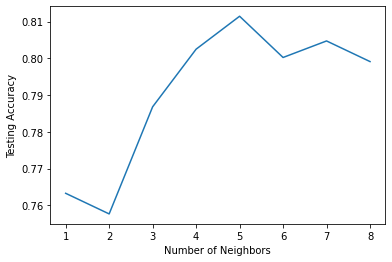

In [81]:
mean_score = grid.cv_results_['mean_test_score']
k = np.arange(1,9)
plt.plot(k, mean_score)
plt.xlabel('Number of Neighbors')
plt.ylabel('Testing Accuracy')

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)

In [ ]:
y_pred = KNN.predict(x_test)

In [ ]:
#training Accuracy

train_accuracy = KNN.score(x_train, y_train)
train_accuracy

In [ ]:
test_accuracy = KNN.score(x_test, y_test)
print(test_accuracy)


from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

Using a higher number of neighbors, it can be seen that the accuracy on the test dataset increases slightly from 0.83 to 0.87